# Mall Customer clustering

### This is a rather small dataset, containing 200 rows and only 5 columns. The features are:

**Customer ID**: The unique ID assigned to each customer

**Gender**: Gender of each customer

**Age**: Age of each customer

**Annual Income(k$)**: Annual Income of each customer

**Spending Score**: Score assigned by our mall based on customer behaviors and spending nature (1-100)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pre-Processing

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#Checking for nulls
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#Checking datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [24]:
df.shape

(200, 6)

In [25]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.340000
std,57.879185,13.969007,26.264721,25.823522,1.122811
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,2.000000
max,200.000000,70.000000,137.000000,99.000000,3.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 8.7+ KB


Hardly any pre-processing was necessary for this clustering experiment, the data was very clean and easy to work with.

# Visualization

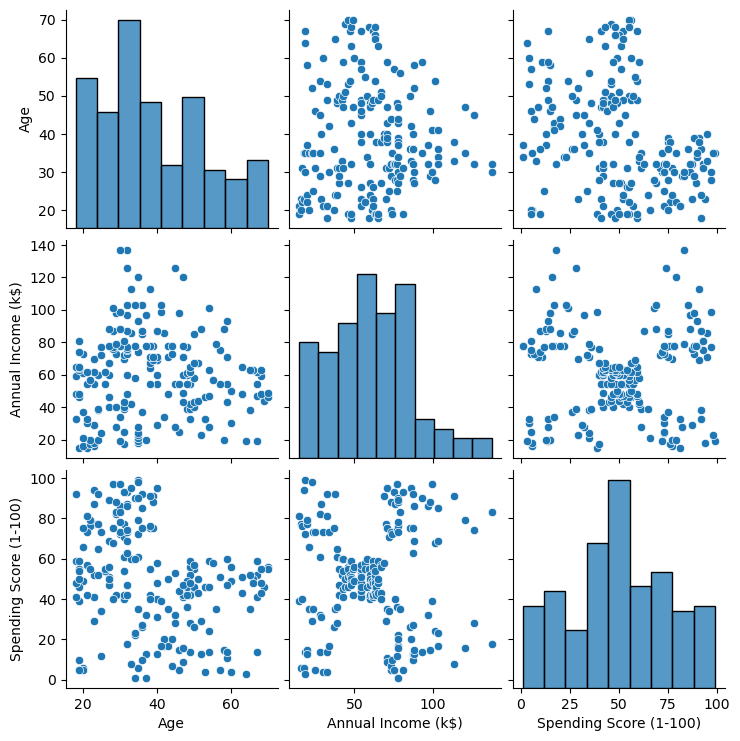

In [6]:
# Pairplot for numerical features
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

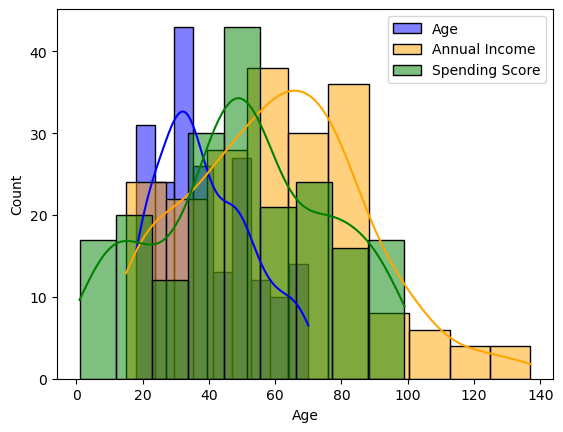

In [7]:
#Histograms for Age, Annual Income, and Spending Score
sns.histplot(data=df, x='Age', kde=True, color='blue', label='Age')
sns.histplot(data=df, x='Annual Income (k$)', kde=True, color='orange', label='Annual Income')
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, color='green', label='Spending Score')


plt.legend()
plt.show()

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

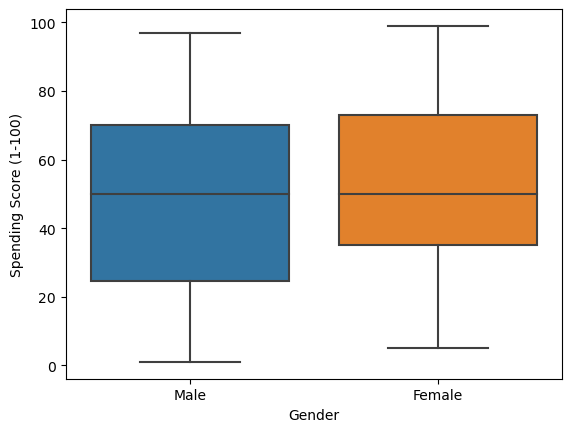

In [30]:
# Box plot of Spending Score across Gender
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

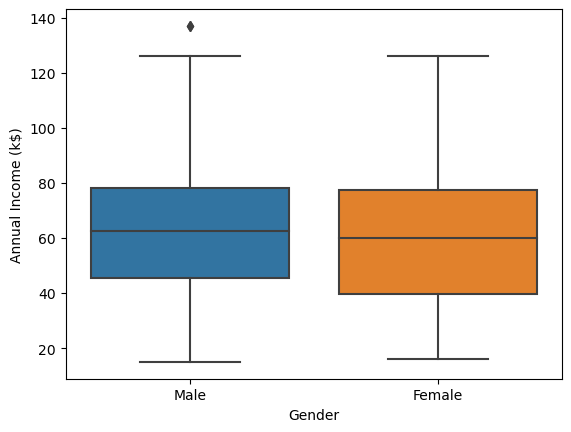

In [31]:
sns.boxplot(data=df, x='Gender', y='Annual Income (k$)')

C:\Users\Spencer\AppData\Local\Temp\ipykernel_12280\2935970228.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


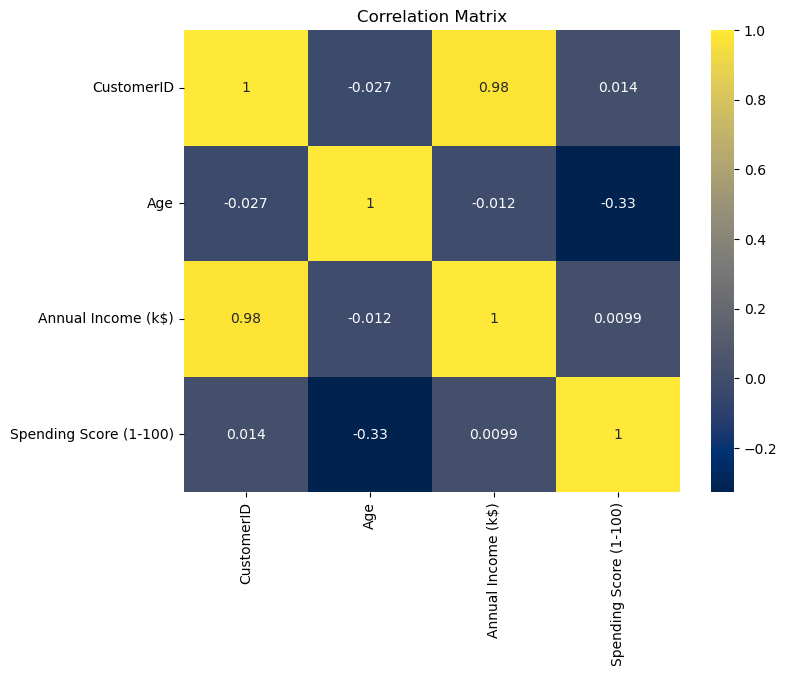

In [10]:
#Correlation Matrix!
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='cividis')
plt.title('Correlation Matrix')
plt.show()

# Modeling

In [11]:
#Selecting our features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [12]:
#Scaling our features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [13]:
# Elbow curve to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

C:\Users\Spencer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Spencer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Spencer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Spencer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

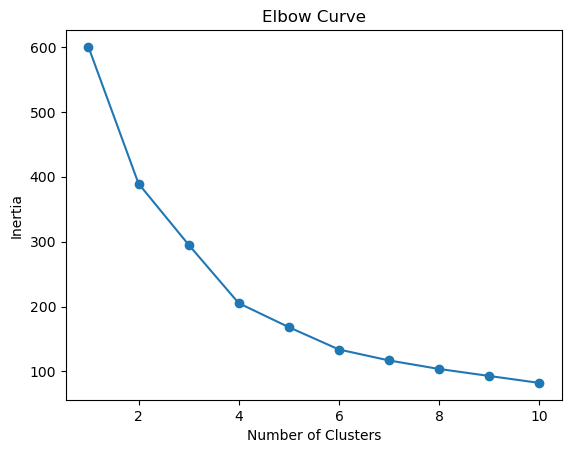

In [14]:
# Plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)
clusters = kmeans.predict(scaled_features)

C:\Users\Spencer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Spencer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
df['Cluster'] = clusters

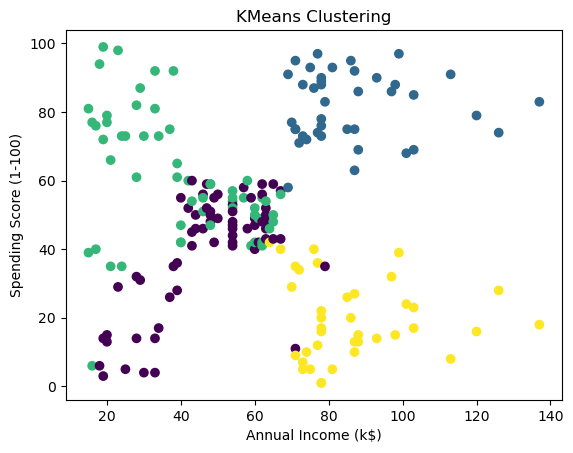

In [33]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=clusters, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()